## 10172100163  宫泽正 机器学习2

### 调库

In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import warnings
import graphviz
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### 读取数据

In [2]:
path = "F:\ECNU2020_2\人工智能\上机作业\作业4\dat.csv"
data = pd.read_csv(path, header=0, encoding="utf-8")
x=data.iloc[:,:6]
y=data["Label"]
print(x)
print(y)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
0                          49                6652.68          59.5   
1                          49                6652.68          32.0   
2                           9               26360.32         111.5   
3                           0               14410.71          84.0   
4                           9                7294.69         290.0   
...                       ...                    ...           ...   
9995                        2               15461.07         286.0   
9996                        2               14691.73          64.5   
9997                        7                9183.70          30.0   
9998                        0                 380.00         380.0   
9999                       16                8363.70        2535.0   

      PAID_IN_AMOUNT_ALLOCATION  EXPENSE_TYPE_DESC  CITY  
0                          59.5                  4     1  
1                          32.0          

### 数据分类

In [3]:
x_train, x_test, y_train, y_test =train_test_split(x,y,train_size=0.7,random_state=1)
print(x_train)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
2228                       24                5097.00          47.0   
5910                       70                3592.20        1560.0   
1950                        4                7483.00          50.0   
2119                       15               10356.00        2864.0   
5947                        0               13979.64         203.0   
...                       ...                    ...           ...   
2895                        1                3102.74          23.0   
7813                        0                6858.00         440.0   
905                        33               14849.20         343.8   
5192                        0                4760.00         500.0   
235                        22                9487.24          16.0   

      PAID_IN_AMOUNT_ALLOCATION  EXPENSE_TYPE_DESC  CITY  
2228                       47.0                  2     1  
5910                     1560.0          

### 准备工作：作重要性图函数

In [4]:
def draw_importance(model):
    np.set_printoptions(precision=2)
    importances = model.feature_importances_
    print(importances)  
    plt.figure()              
    X = [1, 2, 3, 4, 5, 6]
    #X=['GAP_between_Create_Last', 'TOTAL_EXPENSED_AMOUNT', 'APPROVED_AMT', 'PAID_IN_AMOUNT_ALLOCATION', "EXPENSE_TYPE_DESC", "CITY"]
    Y = importances
    plt.bar(X, Y, 0.4, color="#7F3360")
    plt.xlabel("Feature")
    plt.ylabel("importance")
    plt.title("Feature Importance")
    plt.xlim(0, 7)
    ax = plt.gca()
    ax.set_xticks(np.linspace(1, 6, 6))
    ax.set_xticklabels(('GAP_between_Create_Last', 'TOTAL_EXPENSED_AMOUNT', 'APPROVED_AMT',
                       'PAID_IN_AMOUNT_ALLOCATION', "EXPENSE_TYPE_DESC", "CITY"), fontsize=7)
    for label in ax.get_xmajorticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment("right")
    plt.legend(loc='lower right', fontsize=5)
    plt.show()

####  DecisionTreeClassifier-entropy

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2239
           1       0.61      0.63      0.62       761

    accuracy                           0.80      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.80      0.80      0.80      3000

[0.15 0.41 0.1  0.1  0.07 0.17]


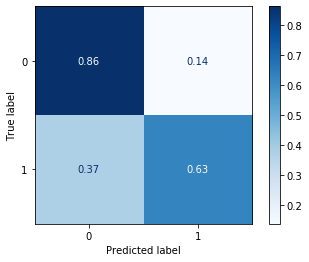

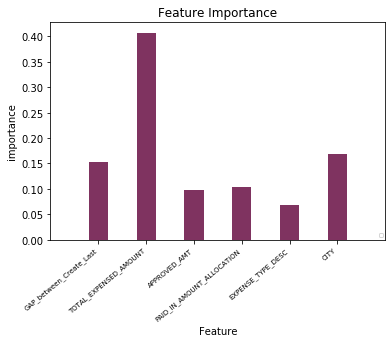

In [5]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)
y_test_hat = dt.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
dt_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(dt, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
draw_importance(dt)

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2239
           1       0.62      0.63      0.62       761

    accuracy                           0.81      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.81      0.81      0.81      3000

[0.16 0.4  0.11 0.1  0.07 0.17]


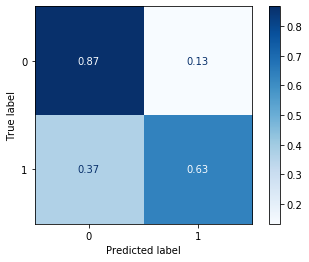

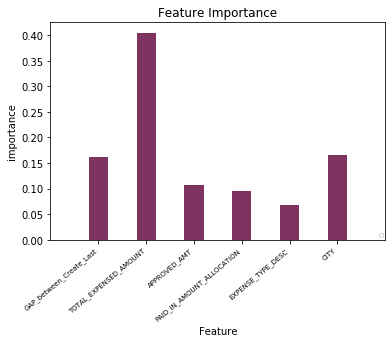

In [30]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)
y_test_hat = dt.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
dt_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(dt, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
draw_importance(dt)

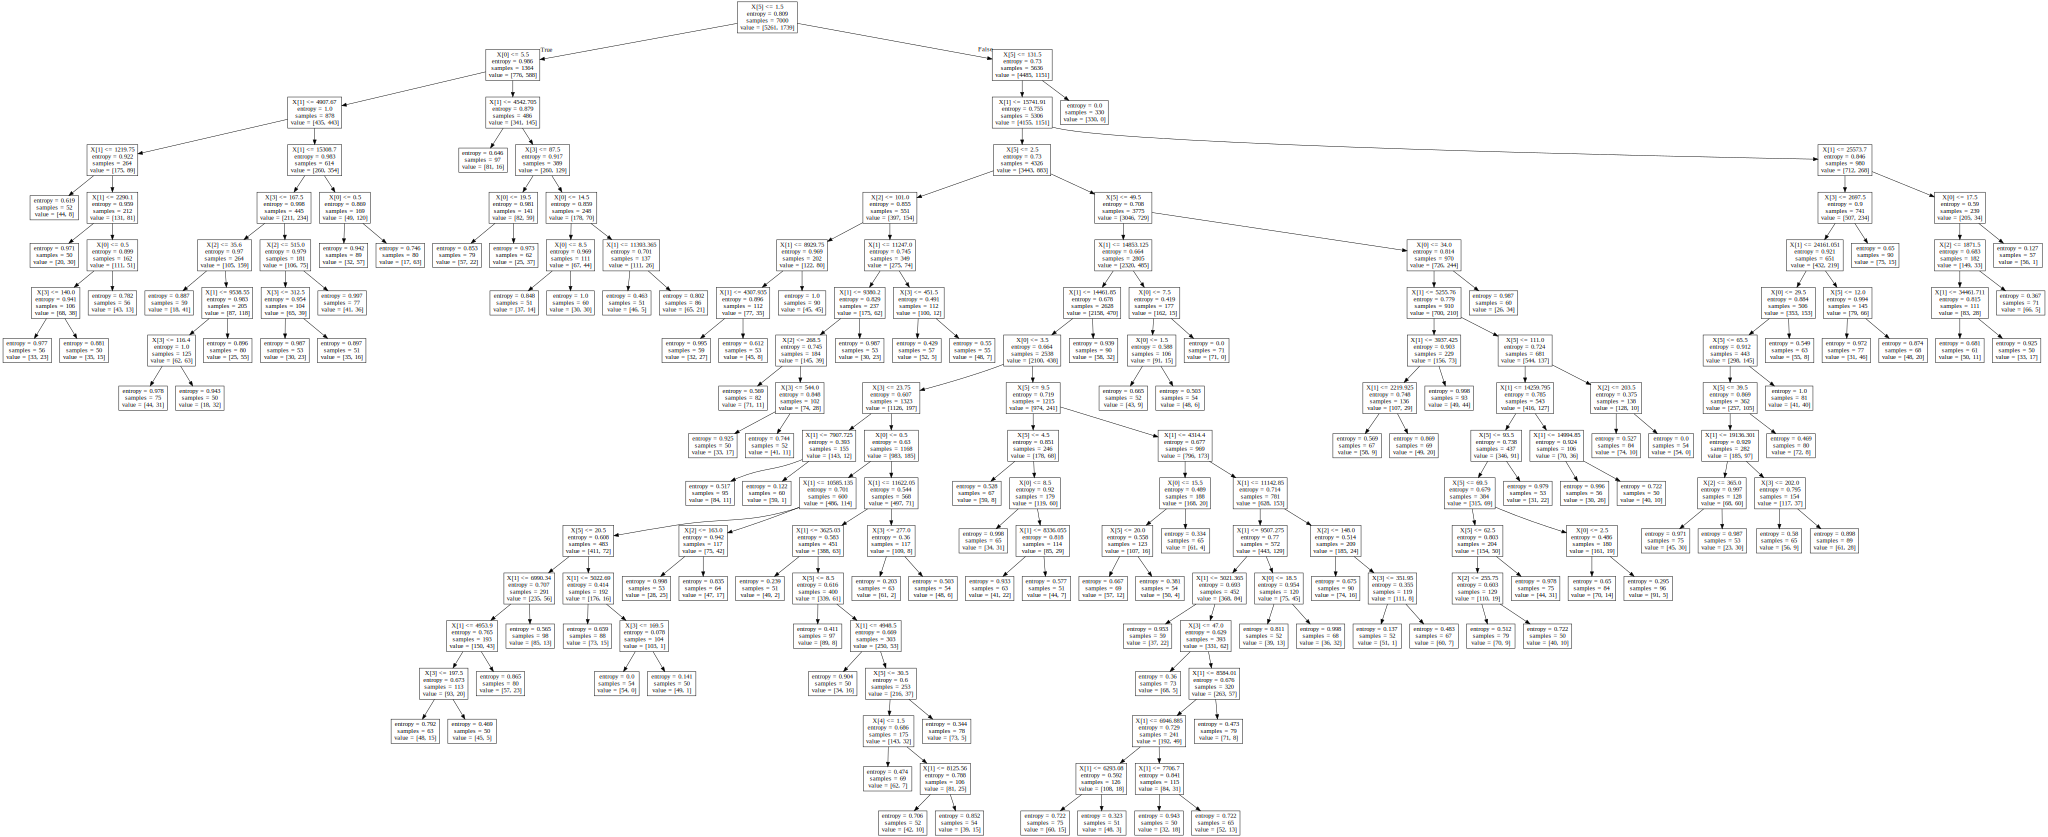

In [7]:
data=tree.export_graphviz(dt,out_file=None)
graph = graphviz.Source(data)
graph

#### DecisionTreeClassifier-gini

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2239
           1       0.61      0.64      0.63       761

    accuracy                           0.81      3000
   macro avg       0.74      0.75      0.75      3000
weighted avg       0.81      0.81      0.81      3000

[0.15 0.43 0.11 0.09 0.06 0.16]


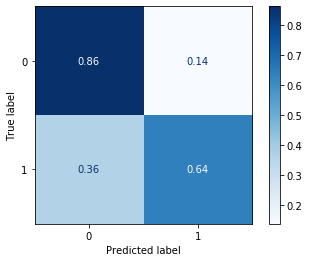

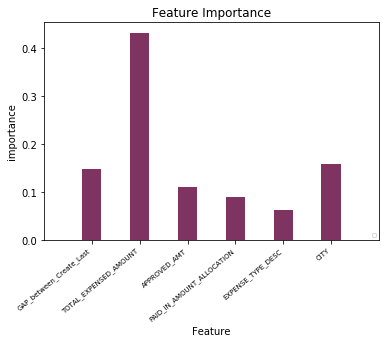

In [37]:
dtg = DecisionTreeClassifier()
dtg.fit(x_train,y_train)
y_test_hat = dtg.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
dtg_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(dtg, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
draw_importance(dtg)

#### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2239
           1       0.49      0.32      0.39       761

    accuracy                           0.74      3000
   macro avg       0.64      0.60      0.61      3000
weighted avg       0.72      0.74      0.72      3000



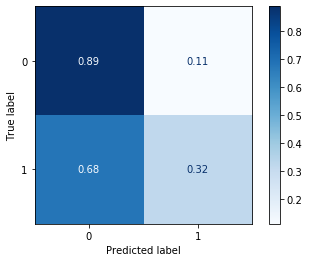

In [9]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_test_hat = knn.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
knn_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(knn, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')

#### GradientBoostingClassifier

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2239
           1       0.49      0.32      0.39       761

    accuracy                           0.74      3000
   macro avg       0.64      0.60      0.61      3000
weighted avg       0.72      0.74      0.72      3000

[0.12 0.43 0.04 0.05 0.06 0.3 ]


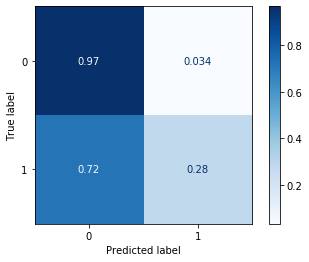

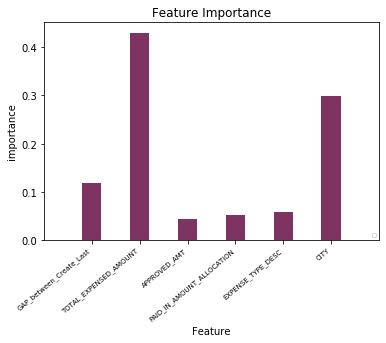

In [23]:
gbc =  GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train,y_train)
y_test_hat = knn.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
gbc_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(gbc, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
draw_importance(gbc)

#### SVM

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2239
           1       0.49      0.32      0.39       761

    accuracy                           0.74      3000
   macro avg       0.64      0.60      0.61      3000
weighted avg       0.72      0.74      0.72      3000



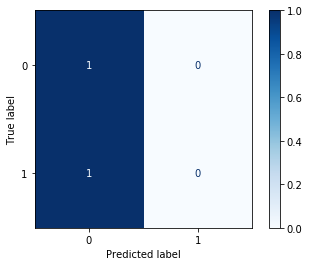

In [11]:
svm =  SVC(kernel='rbf', probability=True)
svm.fit(x_train,y_train)
y_test_hat = knn.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
svm_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(svm, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')

#### LogisticRegression

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      2239
           1       0.00      0.00      0.00       761

    accuracy                           0.75      3000
   macro avg       0.37      0.50      0.43      3000
weighted avg       0.56      0.75      0.64      3000



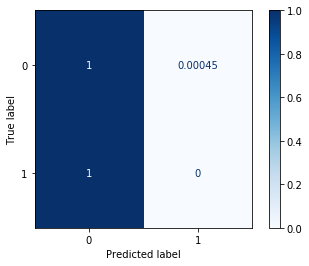

In [12]:
lr =  LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
y_test_hat = lr.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
lr_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(lr, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')

#### RandomForestClassifier-entropy

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2239
           1       0.78      0.40      0.53       761

    accuracy                           0.82      3000
   macro avg       0.80      0.68      0.71      3000
weighted avg       0.81      0.82      0.80      3000



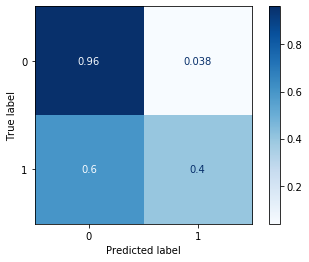

In [42]:
rfc =  RandomForestClassifier(criterion='entropy')
rfc.fit(x_train,y_train)
y_test_hat = rfc.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
rfc_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(rfc, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')

#### RandomForestClassifier-gini

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2239
           1       0.71      0.22      0.34       761

    accuracy                           0.78      3000
   macro avg       0.75      0.60      0.60      3000
weighted avg       0.77      0.78      0.73      3000



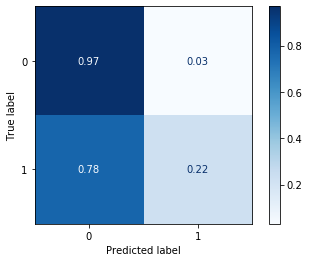

In [43]:
rfc_gini =  RandomForestClassifier(criterion='gini',min_samples_leaf=10)
rfc_gini.fit(x_train,y_train)
y_test_hat = rfc_gini.predict(x_test)
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat,target_names = class_names))
rfc_gini_matrix = confusion_matrix(y_test, y_test_hat)
plot_confusion_matrix(rfc_gini, x_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')

### 交叉验证

In [15]:
def cross(name,model):
    scores = cross_val_score(model,x,y,cv=5)
    print(name,end="")
    print(scores)

In [16]:
cross("dt",dt)
cross("dtg",dtg)
cross("knn",knn)
cross("gbc",gbc)
cross("lr",lr)
cross("svm",svm)
cross("rfc",rfc)
cross("rfc_gini",rfc_gini)

dt[0.76 0.74 0.78 0.71 0.73]
dtg[0.72 0.77 0.76 0.74 0.74]
knn[0.71 0.74 0.73 0.71 0.71]
gbc[0.76 0.78 0.79 0.73 0.75]
lr[0.75 0.75 0.75 0.75 0.75]
svm[0.75 0.75 0.75 0.75 0.75]
rfc[0.78 0.8  0.81 0.76 0.78]
rfc_gini[0.77 0.8  0.8  0.76 0.78]
